# Rice diseases are Classified using CNN with Tensorflow

**Import the libraries**

In [102]:
#Import the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

**Import the dataset**

In [103]:
#Load the dataset:
df = pd.read_csv('train.csv')
#First five rows of data:
df.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


### Explorary Analysis of Dataset

In [104]:
#Check the shape of data:
df.shape

(10407, 4)

In [105]:
df['label'].unique().tolist()

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [106]:
df['variety'].unique().tolist()

['ADT45',
 'IR20',
 'KarnatakaPonni',
 'Onthanel',
 'Ponni',
 'Surya',
 'Zonal',
 'AndraPonni',
 'AtchayaPonni',
 'RR']

In [107]:
df['age'].describe()

count    10407.000000
mean        64.043624
std          8.958830
min         45.000000
25%         60.000000
50%         67.000000
75%         70.000000
max         82.000000
Name: age, dtype: float64

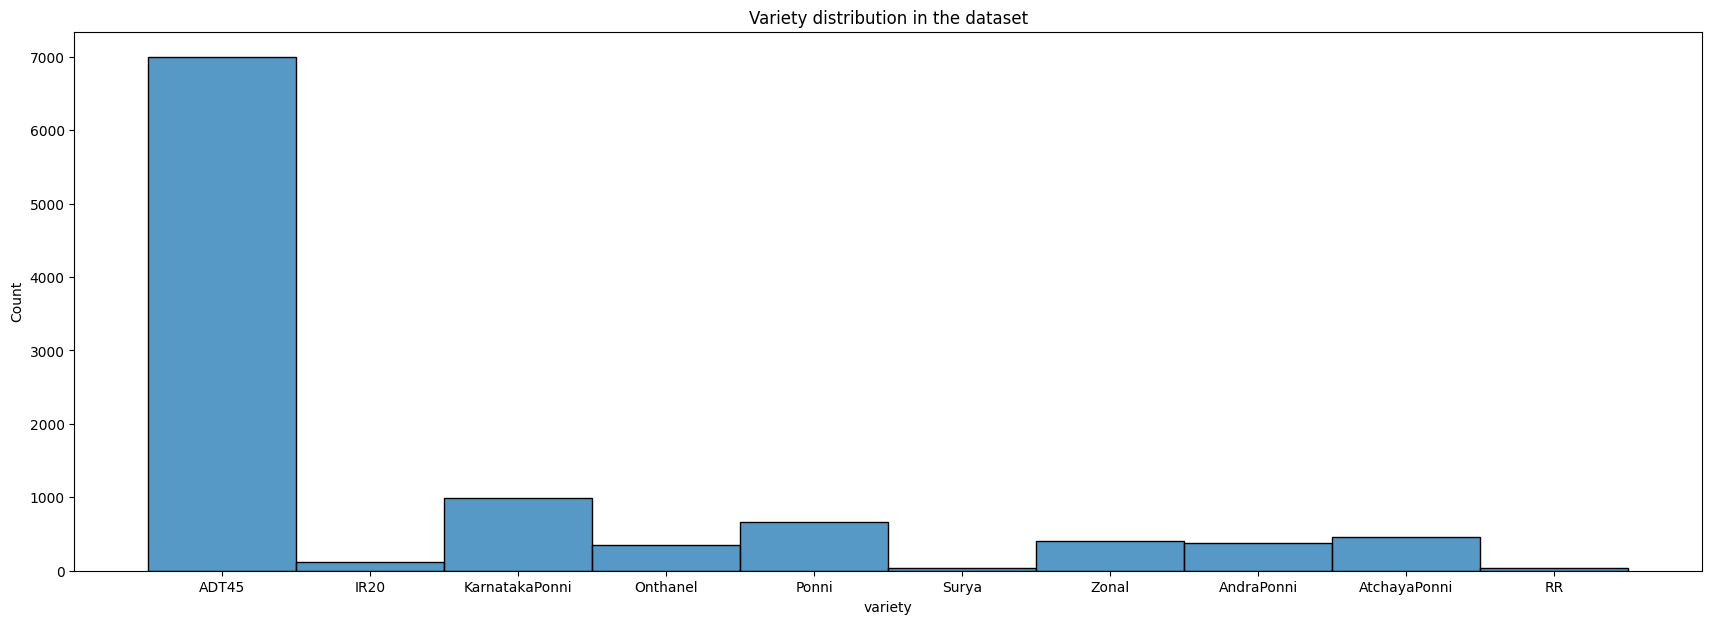

In [108]:
# Plot the data based on varity name:
fig, axes = plt.subplots(1, 1, figsize=(21, 7))
sns.histplot(df, x='variety', ax=axes)
plt.title('Variety distribution in the dataset')
plt.show()

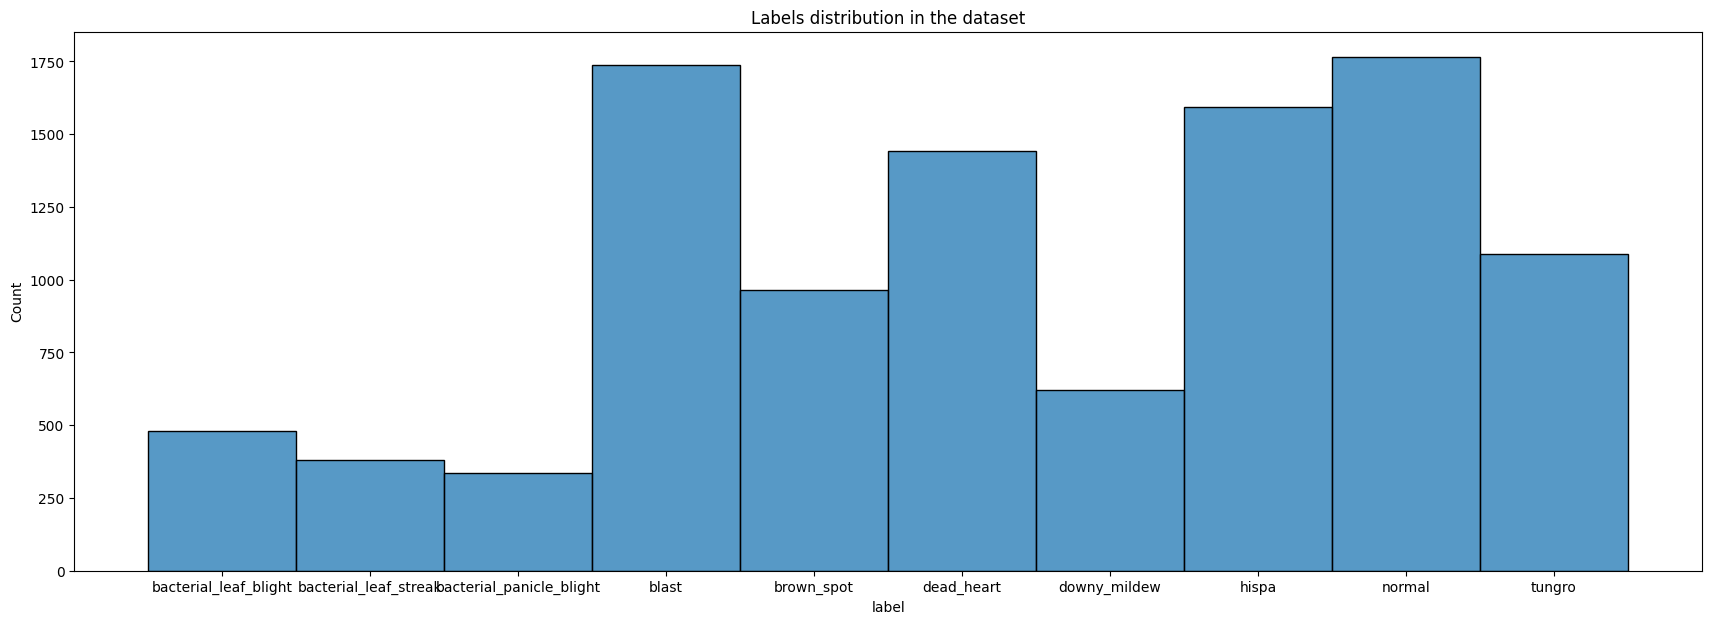

In [109]:
# Plot the data based on varity name:
fig, axes = plt.subplots(1, 1, figsize=(21, 7))
sns.histplot(df, x='label', ax=axes)
plt.title('Labels distribution in the dataset')
plt.show()

In [110]:
normal = df[df['label'] == 'normal']
normal = normal[normal['variety'] == 'ADT45']
five_normals = normal.image_id[:5].values
five_normals.tolist()

['100007.jpg', '100025.jpg', '100135.jpg', '100165.jpg', '100171.jpg']

### Catogrized and Ploting of Normal and Diseased Dataset

In [111]:
dead = df[df['label'] == 'dead_heart']
dead = dead[dead['variety'] == 'ADT45']
five_deads = dead.image_id[:5].values
five_deads.tolist()

['101165.jpg', '102750.jpg', '108367.jpg', '109900.jpg', '100222.jpg']

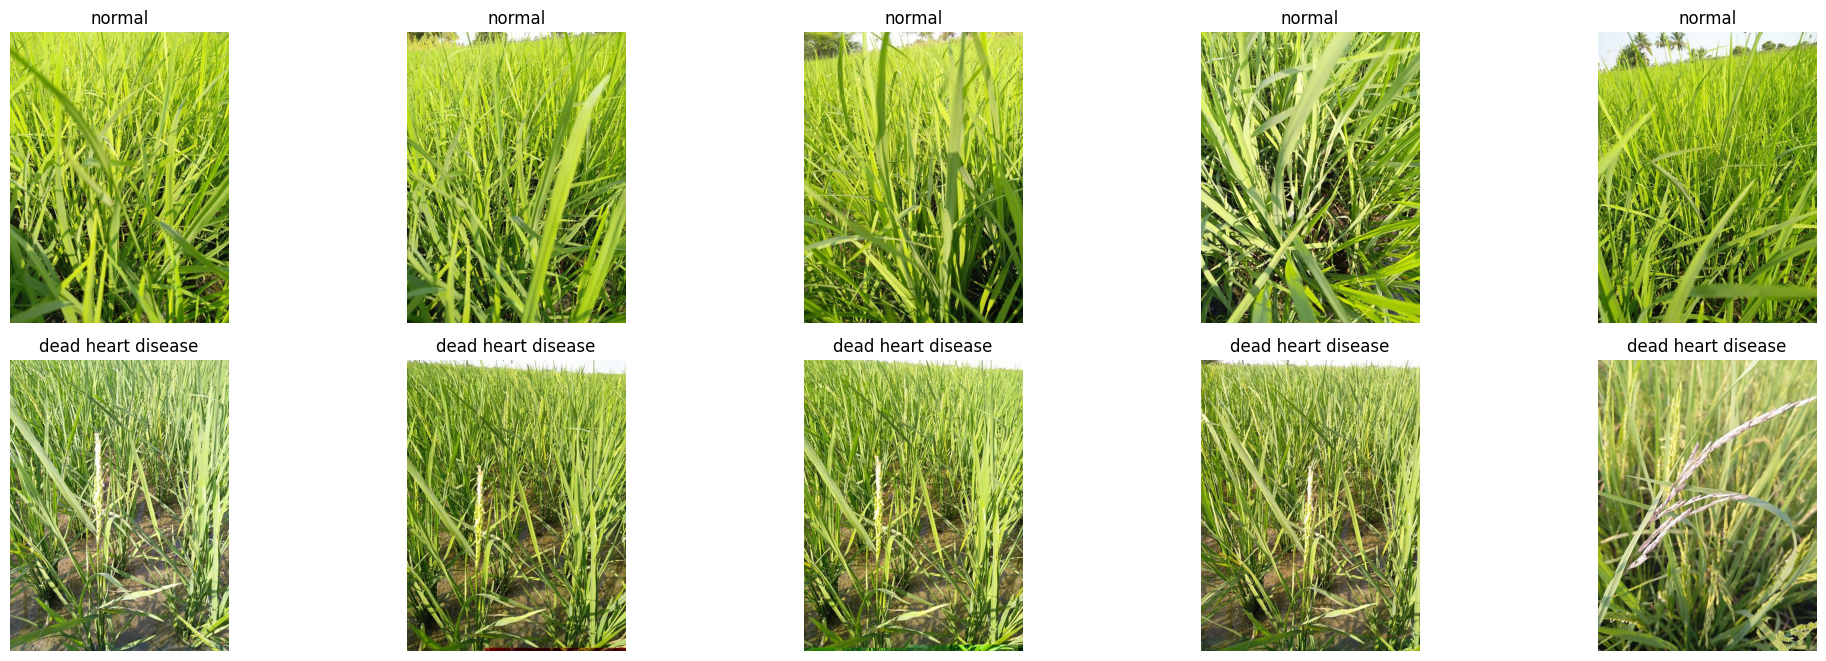

In [112]:
#Ploting of dataset between Diseased and Normalized:
import matplotlib.pyplot as plt
import os
import numpy as np

plt.figure(figsize=(20, 10))
columns = 5
path = 'train_images'  # Assuming your images are in a 'train_images' directory

# Assuming 'five_normals' and 'five_deads' contain filenames with extensions
for i, image_loc in enumerate(np.concatenate((five_normals, five_deads))):
    plt.subplot(10 // columns + 1, columns, i + 1)
    if i < 5:
        image_path = os.path.join(path, "normal", image_loc)
        image = plt.imread(image_path)  # Load the image data
        plt.title('normal')
    else:
        image_path = os.path.join(path, "dead_heart", image_loc)  # Assuming 'dead_heart' is a subdirectory of 'train_images'
        image = plt.imread(image_path)  # Load the image data
        plt.title('dead heart disease')

    plt.imshow(image)  # Display the loaded image
    plt.axis('off')  # Optional: Turn off axis labels

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

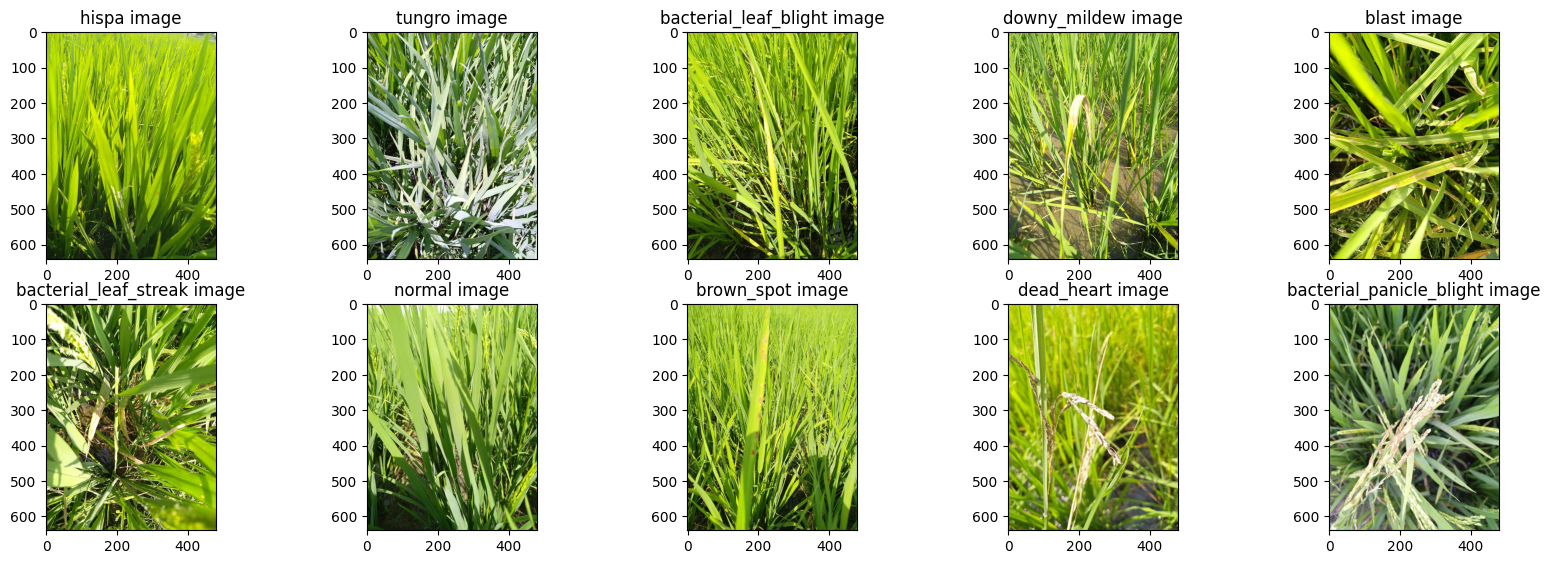

In [113]:
#show the all types of images of Rice Cross: 
images = ['train_images/hispa/106590.jpg',\
          'train_images/tungro/109629.jpg',\
          'train_images/bacterial_leaf_blight/109372.jpg',\
          'train_images/downy_mildew/102350.jpg',\
          'train_images/blast/110243.jpg',\
          'train_images/bacterial_leaf_streak/101104.jpg',\
          'train_images/normal/109760.jpg',\
          'train_images/brown_spot/104675.jpg',\
          'train_images/dead_heart/105159.jpg',\
          'train_images/bacterial_panicle_blight/101351.jpg',\
         ]
diseases = ['hispa','tungro','bacterial_leaf_blight','downy_mildew','blast','bacterial_leaf_streak',\
           'normal','brown_spot','dead_heart','bacterial_panicle_blight']
diseases = [disease + ' image' for disease in diseases]
plt.figure(figsize=(20,10))
columns = 5
for i, image_loc in enumerate(images):
    plt.subplot(len(images)//columns + 1, columns, i + 1)
    image=plt.imread(image_loc)
    plt.title(diseases[i])
    plt.imshow(image)

**Data Encoding**

In [114]:
# Enocode both columns label and veriaty:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
df['label'] = le.fit_transform(df['label'])
df['variety'] = le.fit_transform(df['variety'])
df.head()

,image_id,label,variety,age
0,100330.jpg,0,0,45
1,100365.jpg,0,0,45
2,100382.jpg,0,0,45
3,100632.jpg,0,0,45
4,101918.jpg,0,0,45


### Parameter and Directory of Training and Validation dataset:

In [ ]:
# def the paramters:
batch_size = 16 
img_height = 224
img_width = 224

In [116]:
#Directory of training Dataset:
train_df = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.


In [117]:
#Directory pf Validation dataset:
val_df = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [118]:
#Class of train dataset:
class_name = train_df.class_names
print(class_name)

['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


In [119]:
#Batches of dataset:
for image_batch, labels_batch, in train_df:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(16, 224, 224, 3)
(16,)


**Normalization of Dataset**

In [120]:
#Normalized the dataset:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [121]:
#Normalization of Training dataset:
normalized_df = train_df.map(lambda x, y :(normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_df))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


#### AutoTune of dataset

In [122]:
#AUTOTUNE of dataset:
AUTOTUNE = tf.data.AUTOTUNE
train_df = train_df.cache().prefetch(buffer_size=AUTOTUNE)
val_df = val_df.cache().prefetch(buffer_size=AUTOTUNE)

# Model Implementation on Dataset to Predict the Disease

In [126]:
#Apply the Model:
num_classes = len(class_name)
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)

])

In [127]:
#Compile the Model:
model.compile(
    optimizer='adam',
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [ ]:
#Fit the Model:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=2)
history = model.fit(train_df, validation_data=val_df, epochs=2, callbacks = [early_stopping])

: 

### Ploting the dataset:

131/131 ━━━━━━━━━━━━━━━━━━━━ 60s 457ms/step - accuracy: 0.7445 - loss: 1.1218


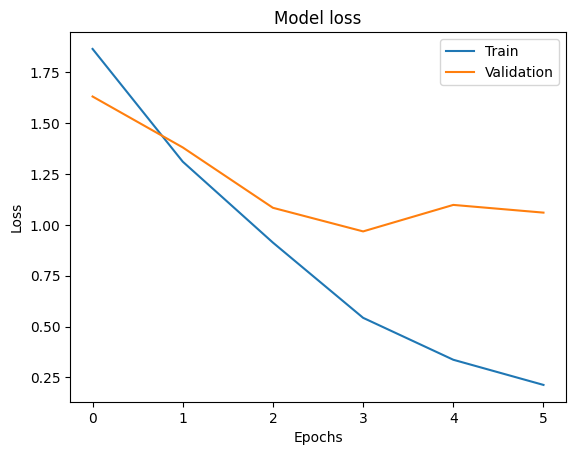

In [129]:
# Plot the Loss and Validation Loss:
loss = model.evaluate(val_df)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

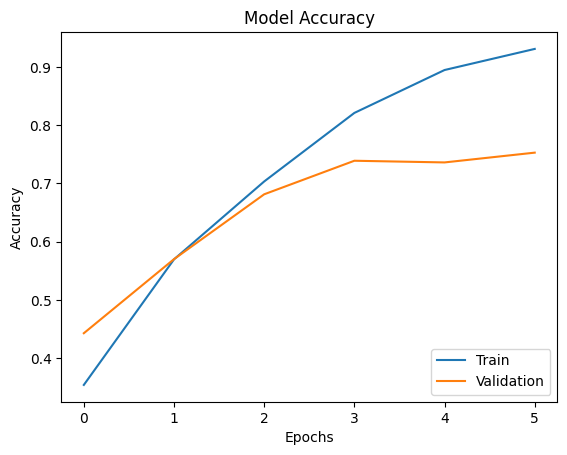

In [130]:
#Plot the Accuracy and Validation Accuracy:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()